# Importar datos a notebook

In [1]:
# Cambiar el directorio a drive
from google.colab import drive
root = '/content/drive'
proj = '/MyDrive/Repositorio/Saludos'
drive.mount(root)
%cd {root}{proj}

Mounted at /content/drive
/content/drive/MyDrive/Repositorio/Saludos


In [2]:
# Verificar directorio dentro de drive
!pwd

/content/drive/MyDrive/Repositorio/Saludos


In [3]:
# Mostrar archivos del directorio
%ls

index.ipynb  src/


# Importar bibliotecas

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.fft import fft
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [5]:
# Importar funciones
%run ./src/notebook/ProcesarDatos.ipynb

# Adquisicion

In [6]:
# Leer data
data=leerExceltoFFT('./src/document/data.xlsx')
data=(data.T/np.max(data,axis=1)).T

In [7]:
# Crear target de data
target=np_utils.to_categorical(np.repeat([np.arange(0,16)],10))
print(target.shape)
print(target[0:15,:])

(160, 16)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
# Dividir valores de prueba y entranamiento
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 19999)
(48, 19999)
(112, 16)
(48, 16)


# Entrenar neurona

In [9]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Con model.fit

In [25]:
model=Sequential()
model.add(Dense(24,input_dim=19999,activation='relu'))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
modelo_entrenado=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 73ms/step - loss: 2.7160 - accuracy: 0.1071 - val_loss: 2.4066 - val_accuracy: 0.2500
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 2.2065 - accuracy: 0.3750 - val_loss: 1.9631 - val_accuracy: 0.4792
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 1.8176 - accuracy: 0.4375 - val_loss: 1.7552 - val_accuracy: 0.4167
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5731 - accuracy: 0.4286 - val_loss: 1.6360 - val_accuracy: 0.4375
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 1.3709 - accuracy: 0.4732 - val_loss: 1.4857 - val_accuracy: 0.5208
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 1.1827 - accuracy: 0.6161 - val_loss: 1.3634 - val_accuracy: 0.5208
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 1.0339 - accuracy: 0.7411 - val_loss: 1.2642 - val_accuracy: 0.5833
Epoch 8/100
4/4 [===

In [28]:
ans=[]
for i in range (160):
#     print(i)
    ans.append(np.squeeze(model.predict(np.atleast_2d(data[i,:]))))
#     print(ans.shape)
#     print('Dataset %i: %i' %(i//10,np.argmax(ans)))
#     print(np.sum((i//10)==np.argmax(ans)))

In [29]:
ar=np.arange(160)//10
# print(ar)
# print(np.shape(ans))
# print(np.argmax(ans,axis=1))
print(np.sum(ar==np.argmax(ans,axis=1)))

147


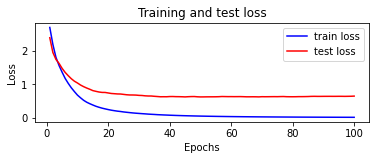

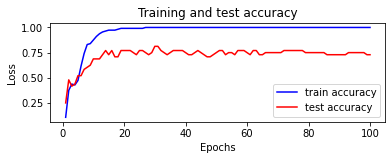

In [30]:
loss = modelo_entrenado.history['loss']
val_loss = modelo_entrenado.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.subplot(2,1,1)
plt.plot(epochs,loss, 'b', label='train loss')
plt.plot(epochs,val_loss, 'r', label='test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = modelo_entrenado.history['accuracy']
val_accuracy = modelo_entrenado.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.subplot(2,1,2)
plt.plot(epochs,accuracy, 'b', label='train accuracy')
plt.plot(epochs,val_accuracy, 'r', label='test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Con KerasClassifier

In [10]:
def my_nn():
    model=Sequential()
    model.add(Dense(16,input_dim=19999,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(16,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [11]:
modelo02=KerasClassifier(build_fn=my_nn,epochs=100,verbose=0)
kfold=KFold(n_splits=15,shuffle=True)
results=cross_val_score(modelo02,data,target,cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


0.7745454629262288


# Probar red

In [12]:
dial01=['israel','lucero','merari','jesus']
dial02=['Buenos dias','Buenas noches','Como estas?','Donde estas?']

In [31]:
m1_direct='./src/audio/audio07.wav'
m1=audiotoFFT(m1_direct)
ans=np.argmax(np.squeeze(model.predict(np.atleast_2d(m1))))

In [32]:
print('%s dice: %s' % (dial01[ans//4],dial02[ans%4]))
print(ans)

jesus dice: Buenos dias
12
